## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns  
import scipy.stats as stats  
from skimpy import skim
import sweetviz as sv

## Load the Data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df = df.drop('Id', axis=1)

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1460   │ │ string      │ 43    │                                                          │
│ │ Number of columns │ 80     │ │ int32       │ 34    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean    ┃ sd     ┃ p0     ┃ p25     ┃ p50     ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ MSSubClass      │    0 │      0 │      57 │     42 │     20 │      20 │      50 │     70 │    190 │ ▇▇▂▁▁▁ │  │
│ │ LotFrontage     │  259 │  17.74 │      70 │     24 │     21 │      59 │      69 │     80 │    310 │   ▇▇   │  │
│ │ LotArea         │    0 │      0 │   11000 │  10000 │   1300 │    7600 │    9500 │  12000 │ 220000 │   ▇    │  │
│ │ OverallQual     │    0 │      0 │     6.1 │    1.4 │      1 │       5 │       6 │      7 │     10 │   ▇▆▇▁ │  │
│ │ OverallCond     │    0 │      0 │     5.6 │    1.1 │      1 │       5 │       5 │      6 │      9 │    ▇▂▁ │  │
│ │ YearBuilt       │    0 │      0 │    2000 │     30 │   1900 │    2000 │    2000 │   2000 │   2000 │  ▁▃▅▅▇ │  │
│ │ YearRemodAdd    │    0 │      0 │    2000 │     21 │   2000 │    2000 │    2000 │   2000 │   2000 │ ▃▂▃▁▃▇ │  │
│ │ MasVnrArea      │    8 │   0.55 │     100 │    180 │      0 │       0 │       0 │    170 │   1600 │   ▇▁   │  │
│ │ BsmtFinSF1      │    0 │      0 │     440 │    460 │      0 │       0 │     380 │    710 │   5600 │   ▇▁   │  │
│ │ BsmtFinSF2      │    0 │      0 │      47 │    160 │      0 │       0 │       0 │      0 │   1500 │   ▇    │  │
│ │ BsmtUnfSF       │    0 │      0 │     570 │    440 │      0 │     220 │     480 │    810 │   2300 │ ▇▆▃▁▁  │  │
│ │ TotalBsmtSF     │    0 │      0 │    1100 │    440 │      0 │     800 │     990 │   1300 │   6100 │   ▇▇   │  │
│ │ 1stFlrSF        │    0 │      0 │    1200 │    390 │    330 │     880 │    1100 │   1400 │   4700 │  ▇▇▁   │  │
│ │ 2ndFlrSF        │    0 │      0 │     350 │    440 │      0 │       0 │       0 │    730 │   2100 │  ▇▂▃▁  │  │
│ │ LowQualFinSF    │    0 │      0 │     5.8 │     49 │      0 │       0 │       0 │      0 │    570 │   ▇    │  │
│ │ GrLivArea       │    0 │      0 │    1500 │    530 │    330 │    1100 │    1500 │   1800 │   5600 │  ▅▇▁   │  │
│ │ BsmtFullBath    │    0 │      0 │    0.43 │   0.52 │      0 │       0 │       0 │      1 │      3 │  ▇ ▅   │  │
│ │ BsmtHalfBath    │    0 │      0 │   0.058 │   0.24 │      0 │       0 │       0 │      0 │      2 │   ▇    │  │
│ │ FullBath        │    0 │      0 │     1.6 │   0.55 │      0 │       1 │       2 │      2 │      3 │   ▇ ▇  │  │
│ │ HalfBath        │    0 │      0 │    0.38 │    0.5 │      0 │       0 │       0 │      1 │      2 │  ▇  ▅  │  │
│ │ BedroomAbvGr    │    0 │      0 │     2.9 │   0.82 │      0 │       2 │       3 │      3 │      8 │  ▁▃▇▂  │  │
│ │ KitchenAbvGr    │    0 │      0 │       1 │   0.22 │

In [7]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
numeric_df = df.select_dtypes(include=[np.number])

In [9]:
report = sv.analyze(numeric_df)

                                             |          | [  0%]   00:00 -> (? left)

In [10]:
report.show_html("house_prices_sweetviz.html")

Report house_prices_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


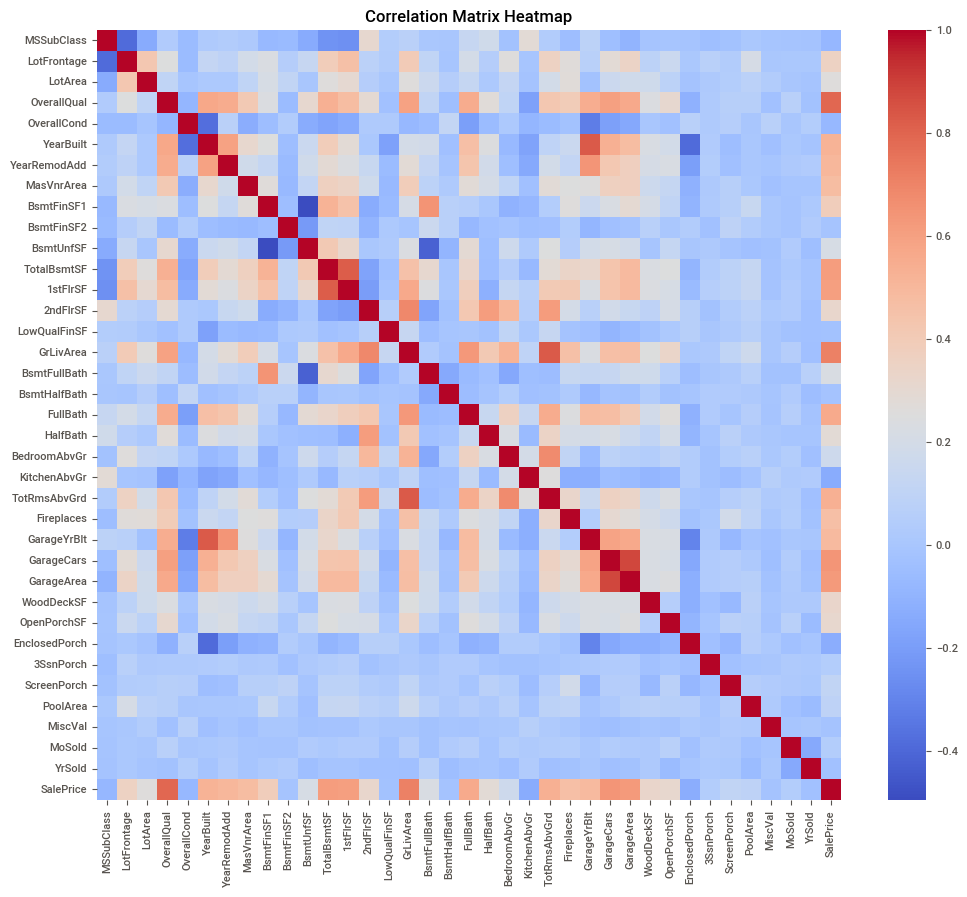

In [11]:
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix Heatmap")
plt.show()

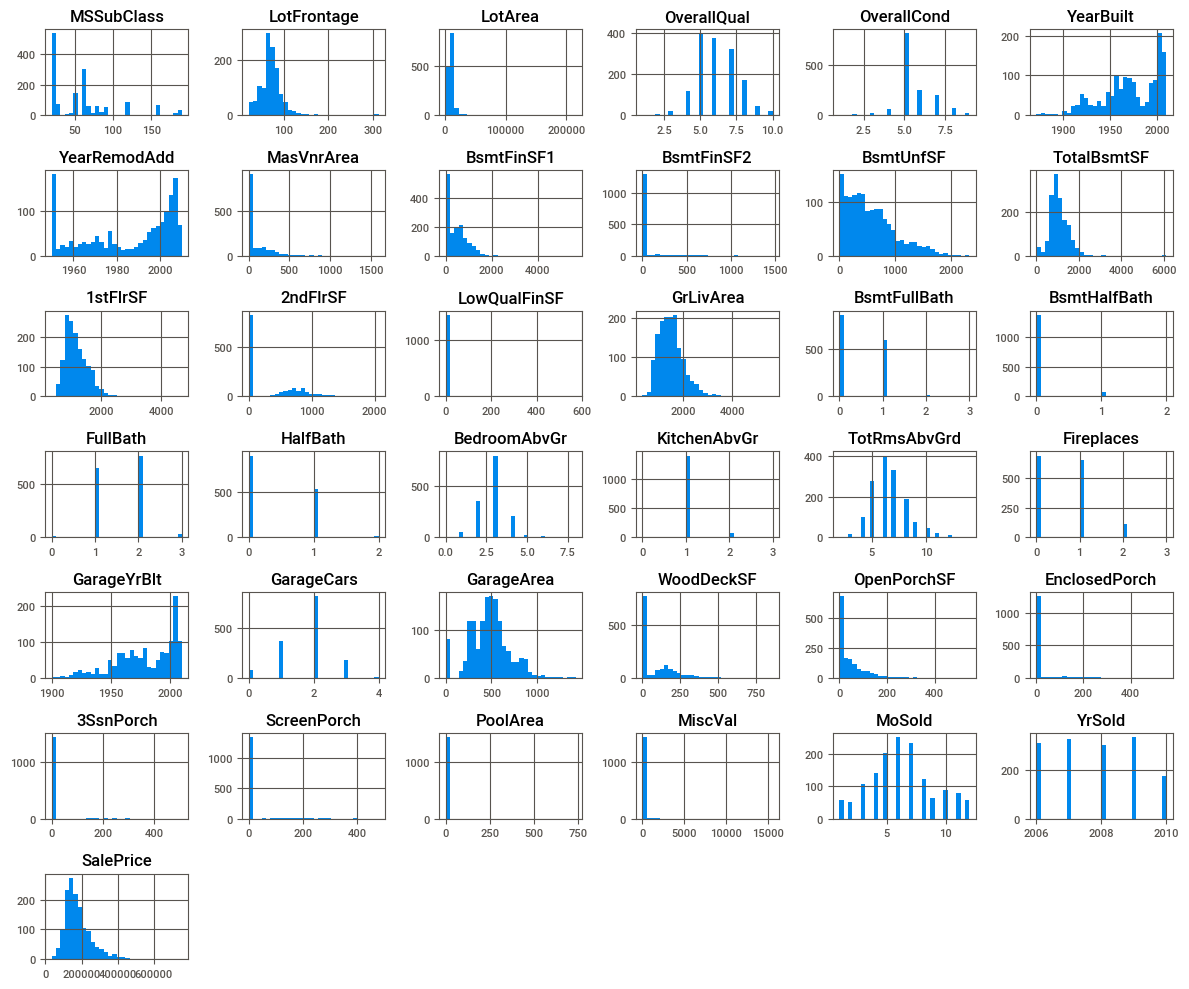

In [12]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

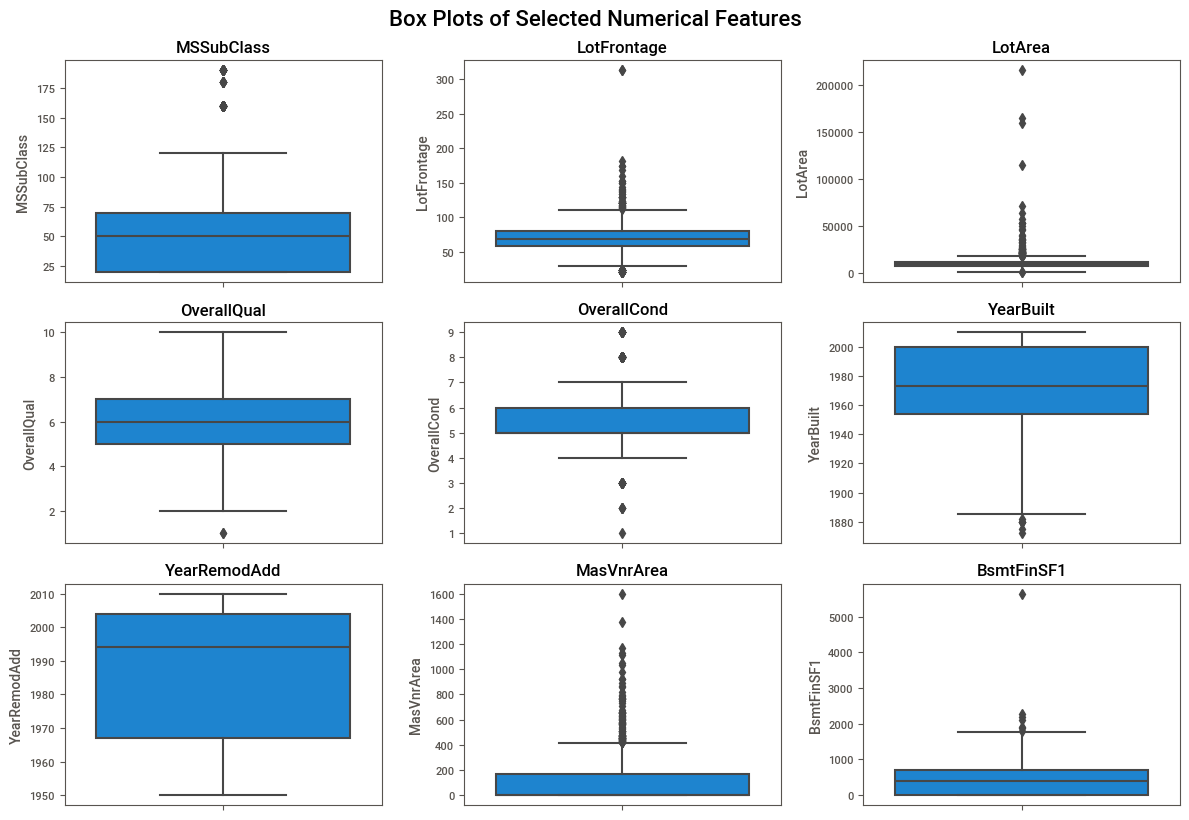

In [13]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols[:9]):  # Limiting to 9 for clarity
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.suptitle("Box Plots of Selected Numerical Features", fontsize=16, y=1.02)
plt.show()

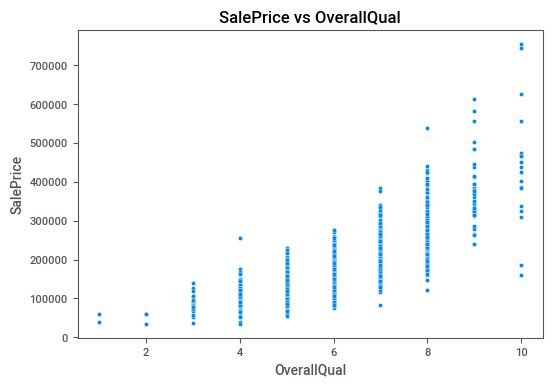

In [14]:
# Scatter plots for highly correlated features with SalePrice
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['OverallQual'], y=df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('SalePrice vs OverallQual')
plt.show()


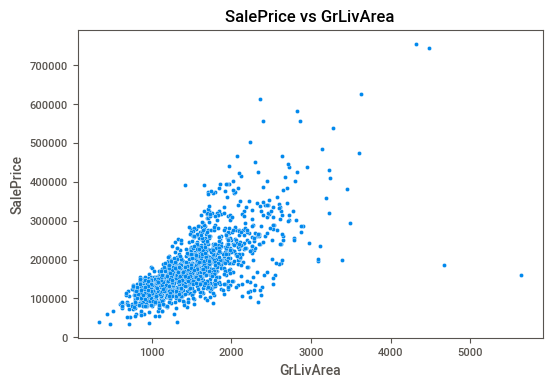

In [15]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.show()

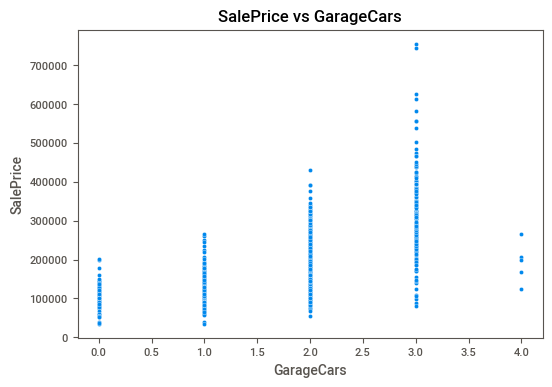

In [16]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['GarageCars'], y=df['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GarageCars')
plt.show()